핸즈온 4장 모델 훈련 p.157-202

## 4.1 선형 회귀

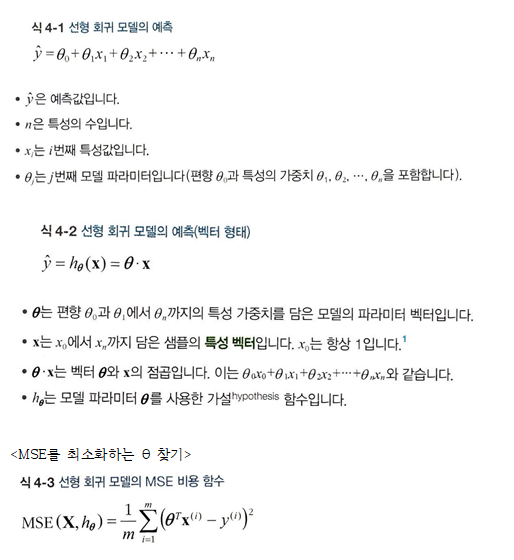

## 4.1.1 정규방정식

정규방정식(normal equation): 비용 함수를 최소화하는 θ를 찾기 위한 해석적인 방법

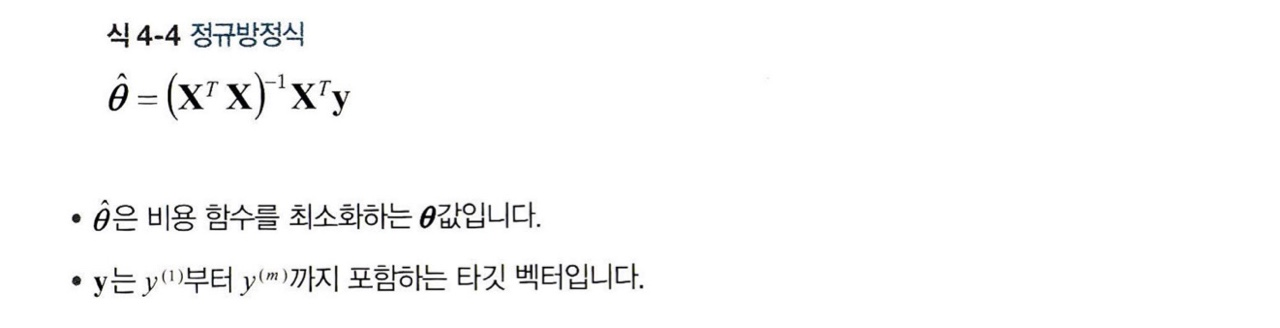

In [72]:
# 무작위로 생성한 선형 데이터셋 
import numpy as np

X = 2*np.random.rand(100,1) # 0~1 표준정규분포 난수를 100*1 행렬로 생성
y = 4 + 3*X + np.random.randn(100,1) # 평균이 0, 표준편차 1인 가우시안 표준정규분포 난수를 100*1 행렬로 생성

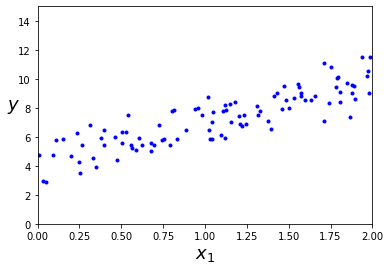

In [73]:
import matplotlib.pyplot as plt
plt.plot(X,y, "b. ") # blue 색상으로 점 모양
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [74]:
# 정규방정식을 이용하여 세타 계산
X_b = np.c_[np.ones((100,1)),X] #np.c_[]: 두 배열을 합침. # 모든 샘플에 X0=1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best
# y = 4 + 3x1 + 가우시안_잡음 함수를 정규방정식으로 계산한 결과 세타0 = 4.441, 세타1=2.605
# 4,3과 비슷하나 잡음 때문에 함수의 파라미터를 정확히 재현하지는 못함.

array([[4.17795097],
       [2.87092976]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [75]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.17795097],
       [9.91981048]])

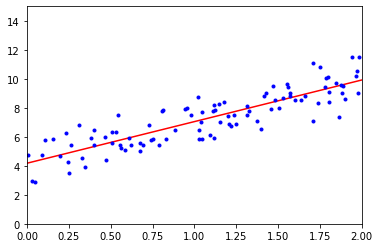

In [76]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [77]:
# 사이킷런에서 선형 회귀 수행
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.17795097]), array([[2.87092976]]))

In [78]:
lin_reg.predict(X_new)

array([[4.17795097],
       [9.91981048]])

In [79]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6) # 최소 제곱 해를 선형 행렬 방정식으로 반환
theta_best_svd

array([[4.17795097],
       [2.87092976]])

$\boldsymbol{\hat{\theta}} = \mathbf{X}^+\mathbf{y}$

$\mathbf{X}^{+}$는 $\mathbf{X}$의 _유사역행렬_ (pseudoinverse)

`np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산할 수 있음.

In [80]:
np.linalg.pinv(X_b).dot(y)

array([[4.17795097],
       [2.87092976]])

### 특이값 분해(singular value decomposition, SVD)

$ 1. SVD는\ 훈련\ 세트\ 행렬\ X를\ 3개의\ 행렬\ 곱셈\ U∑\mathbf{V}^T 로 분해$

$ 2. 유사역행렬은 \mathbf{X}^{+} = \mathbf{V}∑^{+}\mathbf{U}^T$로 계산됨.

$ 3. ∑^{+}$을 계산하기 위해 알고리즘이 ∑를 먼저 구하고 그 다음 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꿈. 

$ 4.$ 그 다음 0이 아닌 모든 값을 역수로 치환 

$ 5.$ 만들어진 행렬을 전치함.

- 정규방정식을 계산하는 것보다 이 방식이 훨씬 효율적임.

- 극단적인 경우도 처리할 수 있음. (m<n이거나 어떤 특성이 중복되어 행렬 $\mathbf{X}^{T}\mathbf{X}$의 역행렬이 없다면 (즉, 특이 행렬이라면) 정규방정식이 작동하지 않음. 하지만 유사역행렬은 항상 구할 수 있음. 



## 4.1.2 시간 복잡도

정규방정식은 (n+1)x(n+1) 크기가 되는 $\mathbf{X}^{T}\mathbf{X}$의 역행렬을 계산함. 

역행렬을 계산하는 시간 복잡도는 일반적으로 O($\mathbf{n}^{2.4})에서$ O($\mathbf{n}^{3})$ 사이임. (구현 방법의 차이)

사이킷런의 LinearRegression 클래스가 사용하는 SVD방법은 약 O($\mathbf{n}^{2})$임. 특성의 개수가 두 배가 들어나면 계산 시간이 대략 4배가 됨. 

이 방법은 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합함.

## 4.2 경사 하강법

- 경사 하강법(gradient descent, GD): 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해나가는 것

- ${\theta}$를 임의의 값으로 시작해서(무작위 초기화) 한 번에 조금씩 비용 함수(ex. MSE)가 감소하는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킴.

- 학습률(learning rate): 스텝의 크기, 학습 스텝 크기는 비용 함수의 기울기에 비례함. 파라미터가 최솟값에 가까워질수록 스텝 크기가 점진적으로 줄어듬.

- 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸리고, 학습률이 너무 크면 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못할 수 있음.



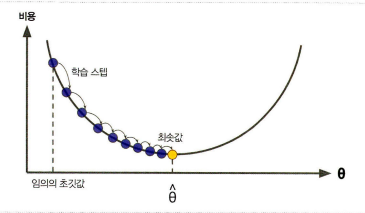

- 경사 하강법의 단점

1. 무작위 초기화로 인해 알고리즘이 전역 최솟값이 아닌 지역 최솟값에 수렴할 수 있음.

2. 알고리즘이 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못할 수 있음.

-> 선형 회귀를 위한 MSE 비용 함수는 볼록 함수로, 지역 최솟값이 없고 하나의 전역 최솟값만 갖는 연속된 함수이므로 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있음. 

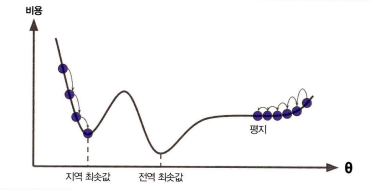

특성들의 스케일이 매우 다르면 비용 함수는 그릇 모양이 아니라 길쭉한 모양일 수 있음. 왼쪽의 경사 하강법 알고리즘은 최솟값의 방향에 거의 직각으로 향하다가 평편한 골짜기를 길게 돌아서 나감. 결국 최솟값에 도달하지만 시간이 오래 걸림. 

-> 경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 함. (ex. StandardScaler 이용) 그렇지 않으면 수렴하는데 훨씬 오래 걸림.

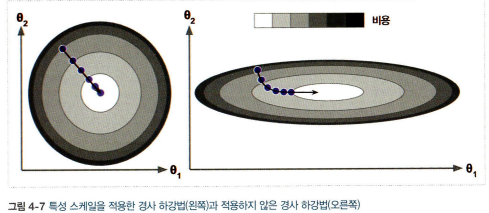

모델의 파라미터 공간에서 비용 함수를 최소화하는 모델 파라미터의 조합을 찾아야 함. 

모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 어려워짐. 

## 4.2.1 배치 경사 하강법

편도 함수: 각 모델 파라미터${\theta}$에 대해 비용 함수의 그레이디언트를 계산해야 함. 즉, ${\theta}$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 함. 

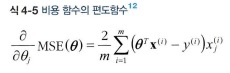

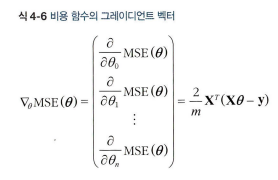

### **배치 경사 하강법**

- 매 경사 하강법 스텝에서 **전체 훈련 데이터 세트** X에 대해 계산. 

- 매우 큰 훈련 세트에서는 아주 느림. 

- 특정 수에 민감하지 않음.

- 수십만개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD분해보다 경사 하강법을 사용하는 것이 훨씬 빠름.

위로 향하는 그레이디언트 벡터가 구해지면 반대 방향인 아래로 가야 함. 내려가는 스텝의 크기를 결정하기 위해 그레이디언트 벡터에 $\eta$를 곱하여 $\theta$에서 뻄.

식 4-7: 경사 하강법의 스텝

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$


In [81]:
eta = 0.1 # 학습률
n_iterations = 1000 
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta*gradients

In [82]:
theta # 정규방정식으로 찾은 것과 동일

array([[4.17795097],
       [2.87092976]])

In [83]:
# 여러 가지 학습률에 대한 경사 하강법
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

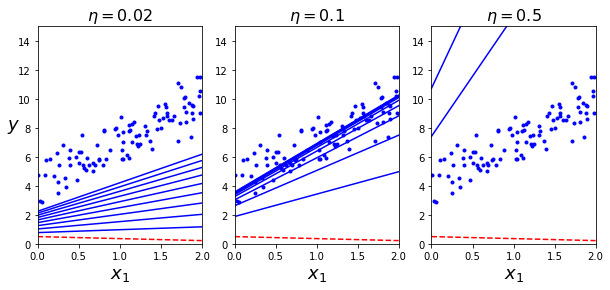

In [84]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

## 4.2.2. 확률적 경사 하강법

- 확률적 경사 하강법: 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 샘플에 대한 그레이디언트를 계산함. 

- 훨씬 빠름.

- 매우 큰 훈련 세트도 훈련시킬 수 있음.

- 확률적(무작위)이기 때문에 불안정함. 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치며 평균적으로 감소함.

- 비용 함수가 매우 불규칙할 경우 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주어 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높음.

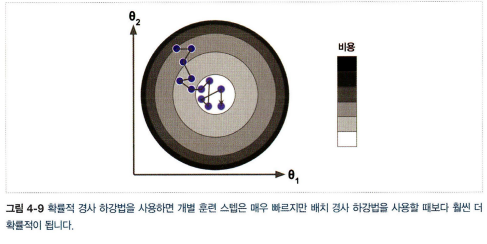

In [85]:
# 에포크: 일반적으로 한 반복에서 m(훈련 세트에 있는 샘플 수)번 반복되고 이때 각 반복을 의미
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄(매 반복에서 학습률을 결정하는 함수) 하이퍼파라미터

def learning_schedule(t):
  return t0/(t + t1) # 학습률을 점차 감소시킴.

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m): 
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index+1]
    yi = y[random_index: random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [86]:
theta

array([[4.22282586],
       [2.85479627]])

- 배치 경사 하강법 코드가 전체 훈련 세트에 대해 1000번 반복하는 동안 확률적 경사 하강법은 훈련 세트에서 50번만 반복하고 좋은 값에 도달함.

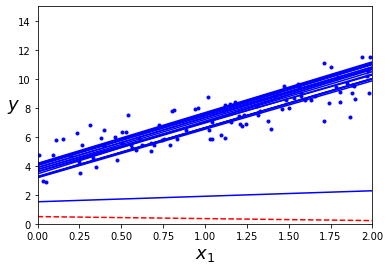

In [87]:
# 훈련 스텝의 첫 20개 스텝
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"      
            plt.plot(X_new, y_predict, style)     
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)        

plt.plot(X, y, "b.")                             
plt.xlabel("$x_1$", fontsize=18)                    
plt.ylabel("$y$", rotation=0, fontsize=18)         
plt.axis([0, 2, 0, 15])                                                       
plt.show()                                          

샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 전혀 선택되지 못할 수도 있음. 알고리즘이 에코크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 에포크에서 다시 섞는 식의 방법을 사용할 수 있음.

In [88]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) 
# 최대 1000번 에포크동안 실행/ 한 에포크에서 0.001보다 적은 손실이 줄어들 때까지 실행/ 규제는 사용X
sgd_reg.fit(X, y.ravel()) # ravel(): 다차원 배열을 1차원으로 변경

SGDRegressor(eta0=0.1, penalty=None)

In [89]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.10791012]), array([2.81760714]))

## 4.2.3 미니배치 경사 하강법

- 미니배치 경사 하강법: 임의의 작은 샘플 세트에 대해 그레이디언트를 계산

- 확률적 경사 하강법에 비해 미니배치 경사 하강법의 장점: 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상


In [90]:
theta_path_mgd = []
n_iterations=50
minibatch_size=20

np.random.seed(42)
theta = np.random.randn(2,1)# 랜덤 초기화

t0,t1 = 200, 1000
def learning_schedule(t):
  return t0 / (t1 + t)

t=0
for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m) #0~(m-1)까지 무작위 배열 생성
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0,m, minibatch_size):
    t +=1
    xi = X_b_shuffled[i:i+minibatch_size]
    yi = y_shuffled[i:i+minibatch_size]
    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(t)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)

In [91]:
theta

array([[4.15518825],
       [2.86894633]])

In [92]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

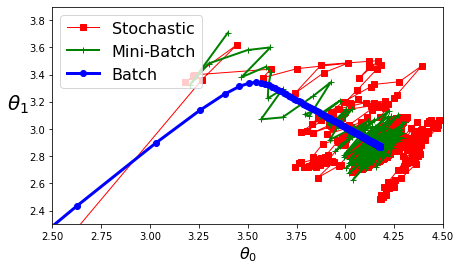

In [94]:
# 파라미터 공간에 표시된 경사 하강법의 경로
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], "r-s", linewidth=1, label='Stochastic')
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1], "g-+", linewidth=2, label='Mini-Batch')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc='upper left', fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=16)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

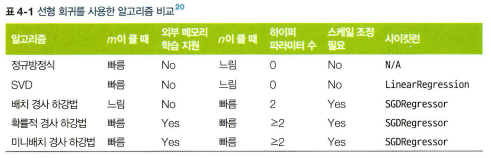

## 4.3 다항 회귀

In [96]:
# 2차 방정식으로 비선형 데이터 생성 (잡음 포함)
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

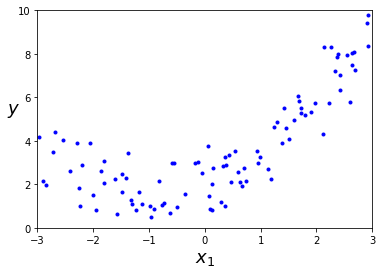

In [97]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [98]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0]) # X와 X^2

[2.38942838]
[2.38942838 5.709368  ]


In [99]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

- 원래 함수는 $ y = 0.5x_1^{2} + 1.0x_1 + 2 +$ 가우시안 잡음

- 예측된 모델은 $y = 0.525x_1^{2} + 0.95x_1 + 1.97$



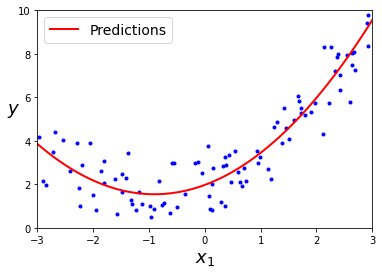

In [103]:
# 다항 회귀 모델의 예측
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label='Predictions')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3,3,0,10])
plt.show()

PolynomialFeatures는 주어진 차수까지 특성 간의 모든 교차항을 추가함. 

## 4.4 학습 곡선

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


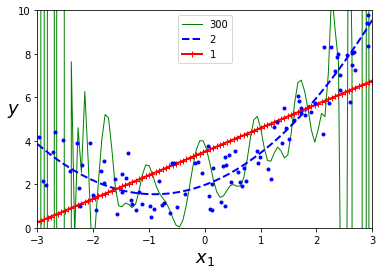

In [105]:
# 고차 다항 회귀(300차)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
  polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
      ("poly_features", polybig_features), 
      ("std_scaler", std_scaler),
      ("lin_reg", lin_reg)
  ])
  polynomial_regression.fit(X,y)
  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X,y,"b.", linewidth=3)
plt.legend(loc='upper_left')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([-3,3,0,10])
plt.show()

- 고차 다항 회귀 모델은 훈련 데이터에 과대적합됨. 반면, 선형 모델은 과소적합됨.

In [121]:
# 모델의 학습 곡선 - 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄.
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='Val')
  plt.xlabel("Traning set size")
  plt.ylabel("RMSE")
  plt.legend()
  plt.show()

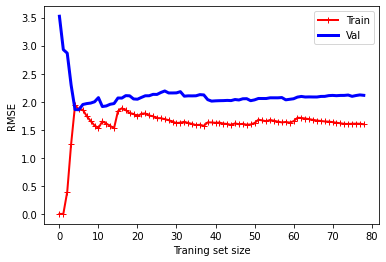

In [127]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
# 과소적합 모델 - 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있음.

- 훈련 데이터 성능: 

그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 2개의 샘플이 있을 땐 모델이 완벽하게 작동함. 

훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능함.-> 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승

- 검증 데이터 성능:

모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어 검증 오차가 매우 큼. 모델에 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소

-> 모델이 훈련 데이터에 과소적합되어 있다면 훈련 샘플을 더 추가해도 효과가 없음. 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 함.

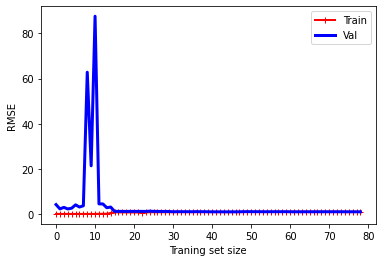

In [128]:
# 10차 다항 회귀의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)), 
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음.

- 두 곡선 사이에 공간이 있음. 즉, 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낮음. (과대적합 모델의 특징) but 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐.

-> 과대적합 모델을 개선하는 한 가지 방법은 검증 오차가 훈련 오차에 접근할 때까지 더 많은 훈련 데이터를 추가 

### 편향 / 분산 트레이드오프

- 편향: 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것. 예를 들어, 데이터가 실제로는 2차인데 선형으로 가정하는 경우. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉬움.

- 분산: 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남. 자유도가 높은 모델(고차 다항 회귀 모델)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합하는 경향이 있음.

- 줄일 수 없는 오차: 데이터 자체에 있는 잡음으로 발생. 오차를 줄이는 유일한 방법은 데이터에서 잡음을 제거하는 것. (ex. 고장 난 센서 같은 데이터 소스를 고치거나 이상치 감지해 제거)

- 트레이드오프: 모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향이 줄어듬. 반대로, 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아짐.

## 4.5 규제가 있는 선형 모델

- 다항회귀 모델을 규제하는 간단한 방법: 다항식의 차수를 감소시킴. 

## 4.5.1 릿지 회귀

### 릿지 회귀(티호노프 규제)

- 규제가 추가된 선형 회귀 버전. 규제항 $ αΣθ_i^{2}$이 비용함수에 추가됨.

- 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력함.

- 규제항은 훈련하는 동안에만 비용 함수에 추가됨. 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가함.

- α: 모델을 얼마나 많이 규제할지 조절. α=0이면 릿지 회귀는 선형 회귀와 같아짐. α가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선 

- 편향 $ θ_0$은 규제되지 않음. 

- 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요함. 규제가 있는 모델은 대부분 마찬가지.

**식 4-8: 릿지 회귀의 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2
$

**식 4-9: 릿지 회귀의 정규방정식**

$
\boldsymbol{\theta} = (X^{T}X + \alpha A)^{-1} X^{T}y
$

릿지 회귀를 계산하기 위해 정규방정식 혹은 경사 하강법 사용

In [129]:
# 정규방정식을 사용한 릿지 회귀 적용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.13357033]])

In [130]:
# 확률적 경사 하강법을 사용한 릿지 회귀 적용
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.10572008])

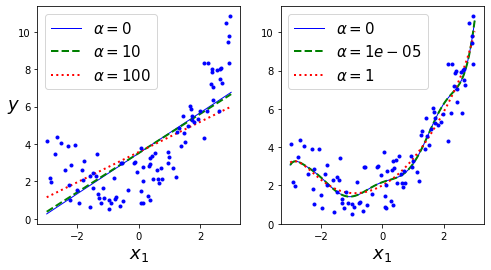

In [133]:
# 다양한 수준의 릿지 규제를 사용한 선형 회귀와 다항 회귀
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

왼쪽 그래프는 평범한 릿지 모델을 사용해 선형적인 예측을 만듬.

오른쪽 그래프는 PolynomialFeatures(degree=10)을 사용해 데이터를 확장하고 StandardScaler를 사용해 스케일을 조정한 후 릿지 모델을 적용함. 즉, 릿지 규제를 사용한 다항 회귀. $α$를 증가시킬수록 직선에 가까워짐. 즉, 모델의 분산은 줄지만 편향은 커짐.

## 4.5.2 라쏘 회귀

**식 4-10: 라쏘 회귀의 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.094e+01, tolerance: 6.317e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


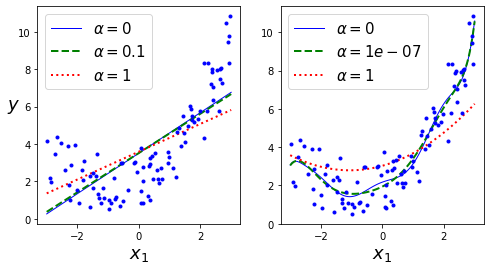

In [134]:
# 다양한 수준의 라쏘 규제를 사용한 선형 회귀와 다항 회귀
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

- 라쏘 회귀는 덜 중요한 특성의 가중치를 제거하려고 함. (가중치가 0이 됨)

- 라쏘 회귀는 자동적으토 특성 선택을 하고 희소 모델을 만듬.

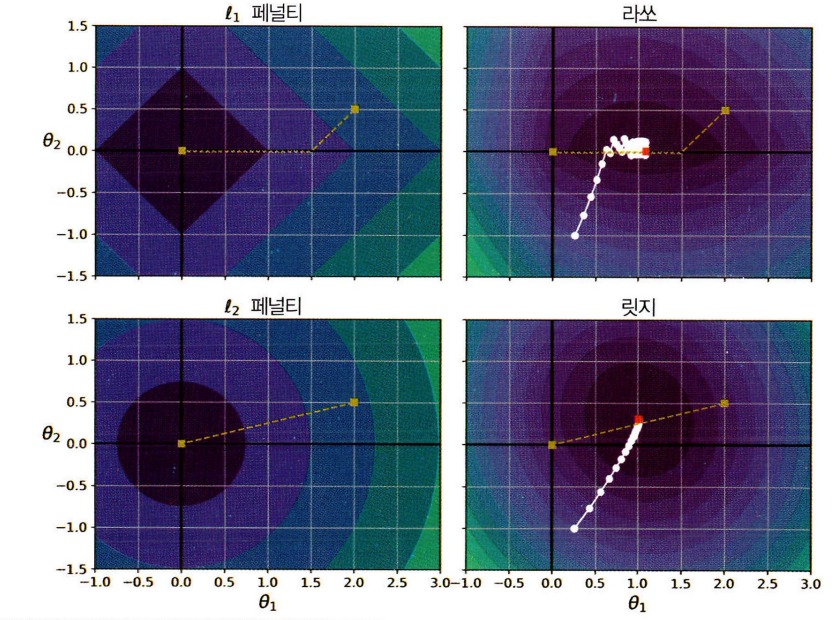

- 라쏘를 사용할 때 경사 하강법이 최적점 근처에서 진동하는 것을 막으려면 훈련하는 동안 점진적으로 학습률을 감소시켜야 함. 

- 라쏘의 비용 함수는 $ \theta_i=0 (i=1,2,...,n)$에서 미분 가능하지 않음. 하지만, $ \theta_i=0$일 때 서브그레이디언트 벡터 g를 사용하면 경사 하강법을 적용할 수 있음. 

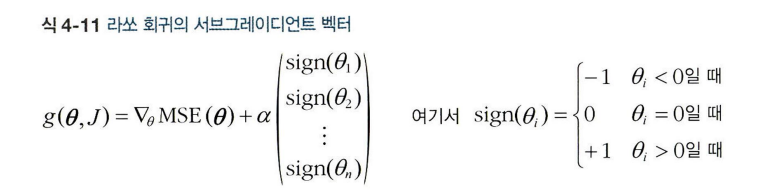

In [135]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

# Lasso 대신 SGDRegressor(penalty='l1')을 사용해도됨.

array([5.09481859])

## 4.5.3 엘라스틱넷

### 엘라스틱넷

- 릿지 회귀와 라쏘 회귀를 절충한 모델

- 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며 혼합 정도는 혼합 비율 r을 사용해 조절함. r=0이면 엘라스틱넷은 릿지 회귀와 같고 r=1이면 라쏘 회귀와 같음.

**식 4-12: 엘라스틱넷 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$

### 선형 회귀(규제가 없는 모델), 릿지, 라쏘, 엘라스틱넷 선택

- 규제가 약간 있는 것이 대부분의 경우 좋으므로 일반적으로 평범한 선형 회귀는 피해야 함.

- 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 불필요한 특성의 가중치를 0으로 만들어 주므로 좋음.

= 특성 수가 훈련 샘플수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때 라쏘가 일반적으로 문제를 일으키므로 엘라스틱넷을 선호함.

In [136]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.09373477])

## 4.5.4 조기 종료

In [137]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [138]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

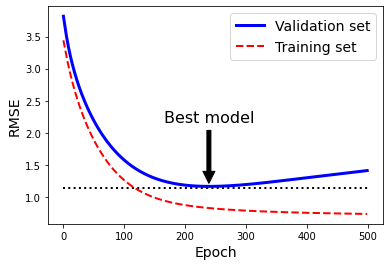

In [139]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

에포크가 진행됨에 따라 알고리즘이 점차 학습되어 RMSE가 줄어들다가 모델이  과대적합되어 검증 에러가 다시 상승함. 

-> 조기종료로 학습 알고리즘 규제

**조기 종료**: 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것



- 확률적 경사 하강법이나 미니배치 경사 하강법에서는 곡선이 매끄럽지 않아 최솟값에 도달했는지 확인하기 어려울 수 있음. 

-> 검증 에러가 일정 시간 동안 최솟값보다 클 때 (모델이 더 나아지지 않는다고 확신이 들 때) 학습을 멈추고 검증 에러가 최소였을 때의 모델 파라미터로 되돌리는 것

In [143]:
from sklearn.base import clone

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005) 
# warm_start=True: fit()메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어감.
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

## 4.6 로지스틱 회귀

- 로지스틱 회귀(로짓 회귀)는 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용됨.

- 이진 분류기: 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측 (양성 클래스). 아니면 클래스에 속하지 않는다고 예측(음성 클래스) 

## 4.6.1 확률 추정

- 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산하여 결괏값의 로지스틱을 출력함.

- 로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수

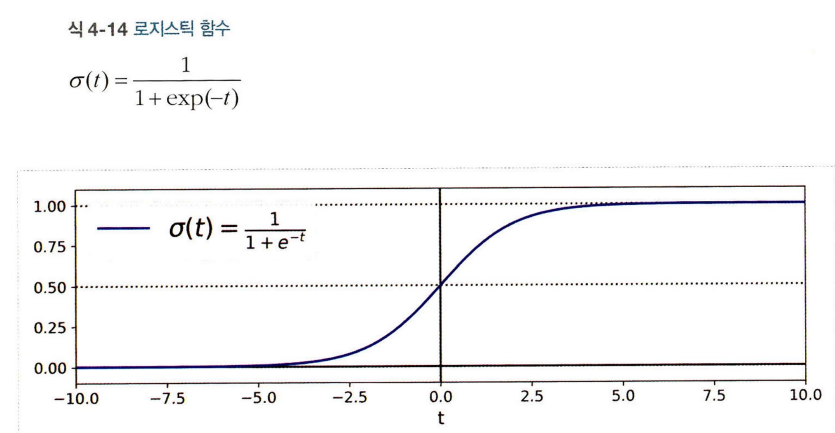

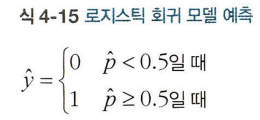

## 4.6.2 훈련과 비용 함수

**식 4-16: 하나의 훈련 샘플에 대한 비용 함수**

$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$

$ $
- t가 0에 가까워지면 -log t 가 매우 커짐. 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가함. 또한, 음성 샘플을 1에 가까운 확률로 추정해도 비용이 증가함. 반면, t가 1에 가까워지면, -log t 는 0에 가까워져 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워짐.

$ $

**식 4-17: 로지스틱 회귀 비용 함수(로그 손실)**

$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$

- 비용 함수의 최솟값을 계산하는 알려진 해가 없음(정규방정식X). 하지만, 비용 함수가 볼록 함수이므로 경사하강법이 전역 최솟값을 찾는 것을 보장함.

$ $


**식 4-18: 로지스틱 비용 함수의 편도 함수**

$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$

$ $

- 각 샘플에 대해 예측 오차를 계산하고 j번째 특성값을 곱해서 모든 훈련 샘플에 대해 평균을 냄. 

## 4.6.3 결정 경계

In [145]:
from sklearn import datasets 
iris = datasets.load_iris()
print(list(iris.keys()))

X = iris['data'][:,3:] # 꽃잎 너비
y = (iris['target']==2).astype(np.int) # Iris virginica이면 1 아니면 0

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [153]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

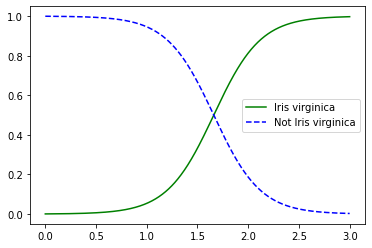

In [154]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-", label='Iris virginica')
plt.plot(X_new, y_proba[:,0], "b--", label='Not Iris virginica')
plt.legend()
plt.show()

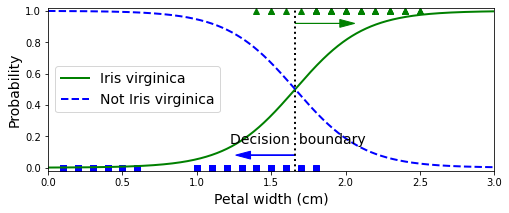

In [161]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new) # Iris virginica일 확률
decision_boundary = X_new[y_proba[:,1]>=0.5][0] # 확률이 0.5이상인 최초 지점

plt.figure(figsize=(8,3))
plt.plot(X[y==0], y[y==0], "bs") # 실제 Iris virginica가 아닌 데이터
plt.plot(X[y==1], y[y==1], "g^") # 실제 Iris virginica인 데이터
plt.plot([decision_boundary, decision_boundary], [-1,2],"k:", linewidth=2)
plt.plot(X_new, y_proba[:,1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", linewidth=2, label='Not Iris virginica')

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

Iris virginica의 꽃잎 너비와 다른 붓꽃의 너비에 중첩되는 부분이 있음. 

꽃잎 너비가 2cm 이상인 꽃은 분류기가 Iris verginica라고 강하게 확신함. (높은 확률을 출력)


In [165]:
decision_boundary

array([1.66066066])

In [164]:
# 꽃잎 너비가 1.7, 1.5일 때 레이블 예측하기
print(log_reg.predict([[1.7],[1.5]]))
print(log_reg.predict_proba([[1.7],[1.5]])[:,1])

[1 0]
[0.54277903 0.33290364]


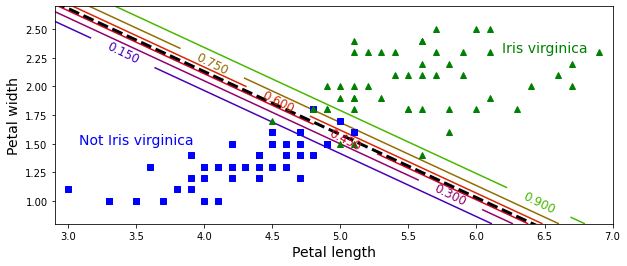

In [167]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

로지스틱 회귀 모델도 l1, l2 페널티를 사용하여 규제 가능 (사이킷런 default: l2 페널티)

사이킷런의 LogisticRegression 모델의 규제 강도를 조절하는 하이퍼파라미터는 $ \alpha$가 아니라 그 역수에 해당하는 C임. C가 높을수록 모델의 규제가 줄어듬.

## 4.6.4 소프트맥스 회귀

- 소프트맥스 회귀(다항 로지스틱 회귀): 로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있음.

- 샘플 x가 주어지면 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 $ s_k(x)$를 계산하고, 그 점수에 소프트맥스 함수(정규화된 지수 함수)를 적용하여 각 클래스의 확률을 추정

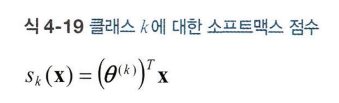

**식 4-20: 소프트맥스 함수**

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$

$ $

K: 클래스 수

$s(x)$: 샘플 x에 대한 각 클래스의 점수를 담은 벡터

$σ(s(x))_k$: 샘플 x에 대한 각 클래스 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정 확률

$ $

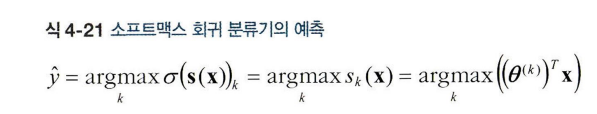

추정 확률이 가장 높은 클래스를 선택. argmax()로 추정 확률이 최대인 k값을 반환

- 소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측. 다중 클래스이지, 다중 출력은 아님. 따라서, 종류가 다른 붓꽃 같이 상호 배타적인 클래스에서만 사용해야 함. 하나의 사진에서 여러 사람의 얼굴을 인식하는 데는 사용할 수 없음.

모델은 크로스 엔트로피 비용 함수를 최소화하도록 (타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하도록) 훈련됨. 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 사용됨.

$ $
**식 4-22: 크로스 엔트로피 비용 함수**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

**식 4-23: 클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터**

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$

In [168]:
X = iris.data[:,(2,3)]
y = iris.target

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [169]:
print(softmax_reg.predict([[5,2]])) # 꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃 예측
print(softmax_reg.predict_proba([[5,2]])) # iris_verginica(클래스 2)일 확률이 가장 높음.

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


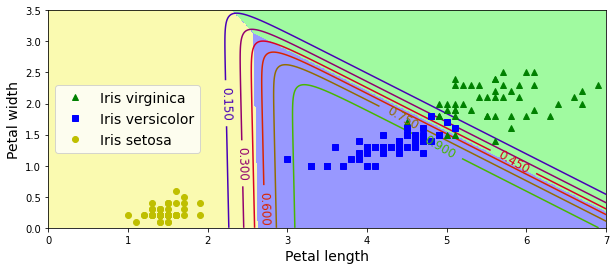

In [170]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()